In [1]:
import os
#import shutil
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_text as text
import seaborn as sns
from pylab import rcParams

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("training_data.csv")

Transactional                  886
Navigational                   701
Brandsøgning                   357
Informational                  272
Information - Sammenligning    168
Inspiration                     61
Information                      1
Name: Category, dtype: int64

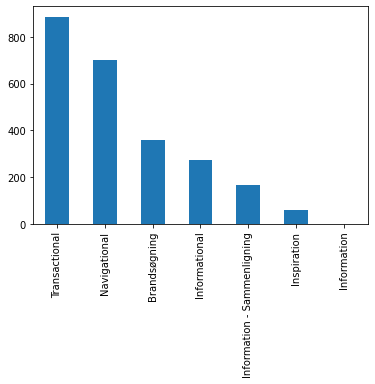

In [5]:
data['Category'].value_counts().plot(kind='bar')
data['Category'].value_counts()

In [6]:
#Change Information - Sammenligning to information
data['Category'] = data['Category'].replace('Information - Sammenligning', 'Informational')
data['Category'] = data['Category'].replace('Information', 'Informational')

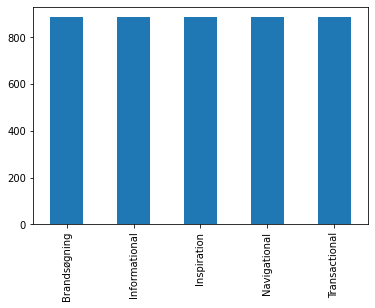

In [7]:
#Repeat lesser categories to balance the dataset using the sample function

data = data.groupby('Category').apply(lambda x: x.sample(886, replace=True)).reset_index(drop=True)

data['Category'].value_counts().plot(kind='bar')



In [8]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42)


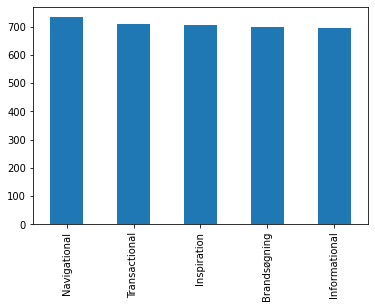

In [9]:
train['Category'].value_counts().plot(kind='bar')

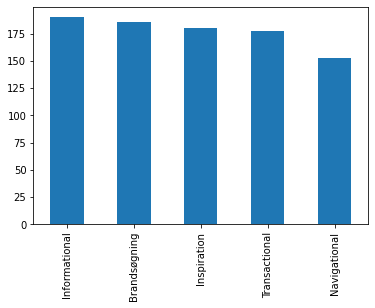

In [10]:
test['Category'].value_counts().plot(kind='bar')

In [11]:
train_df = pd.DataFrame()
train_df['text'] = train['keywords']
train_df['labels'] = train['Category']
train_df['labels'] = train_df['labels'].astype('category').cat.codes


In [12]:

n_labels = len(train_df['labels'].unique())

In [13]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 4.9 MB/s 
     |████████████████████████████████| 451 kB 69.8 MB/s 
     |████████████████████████████████| 9.2 MB 35.2 MB/s 
     |████████████████████████████████| 5.8 MB 47.6 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 7.6 MB 46.2 MB/s 
     |████████████████████████████████| 1.3 MB 66.6 MB/s 
     |████████████████████████████████| 1.9 MB 56.5 MB/s 
     |████████████████████████████████| 182 kB 71.3 MB/s 
     |████████████████████████████████| 168 kB 73.4 MB/s 
     |████████████████████████████████| 182 kB 73.8 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 168 kB 79.7 MB/s 
     |████████████████████████████████| 166 kB 68.4 MB/s 
     |████████████████████████████████| 166 kB 79.6 MB/s 
     |██████████████████████████████

## Method 1 : Intent Classification Using Convolution Neural Network

In [14]:
from simpletransformers.ner import NERModel
from simpletransformers.classification import ClassificationModel

In [15]:
sent_model = ClassificationModel('bert', 'Maltehb/danish-bert-botxo', num_labels=n_labels, use_cuda=True, args={'reprocess_input_data': True, 'overwrite_output_dir': True})

Downloading:   0%|          | 0.00/846 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at Maltehb/danish-bert-botxo were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not 

Downloading:   0%|          | 0.00/378 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/253k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/498k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [16]:
sent_model.train_model(train_df)

  0%|          | 0/3544 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/443 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


(443, 0.567924926835312)

In [17]:
sent_model.predict("stor sofa billig")[0][0]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

4

In [18]:
test_df = pd.DataFrame()
test_df['text'] = test['keywords']
test_df['labels'] = test['Category']

In [19]:
test_df['labels'] = test_df['labels'].replace(['Informational','Navigational','Transactional','Brandsøgning','Inspiration'],[1,3,4,0,2])

In [20]:
predicted = [sent_model.predict(item)[0][0] for item in test_df['text'].values[:10]]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score

accuracy_score(predicted,list(test_df['labels'])[:10])

0.8

In [22]:
label_dict = {
    0: "Brandsøgning",
    1: "Informational",
    2: "Inspiration",
    3: "Navigational",
    4: "Transactional"
}

In [39]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(sent_model, open(filename, 'wb'))

In [25]:
#sent_model = pickle.load(open("finalized_model.sav","rb"))
def process_files(file_object):
  file_df = pd.read_csv(file_object)

  classes = [label_dict[sent_model.predict(item)[0][0]] for item in file_df['keywords'].values[:20] ]
  #file_df["Categories"] = classes
  file_df.to_csv("output.csv")

In [26]:
process_files("training_data.csv")

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
!./ngrok authtokens '2IaJOgIBQeFv9YuhrznBCQ5OCIo_i4NTbdeUq4cVmCZfj7qm'

/bin/bash: ./ngrok: No such file or directory


In [28]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 5.2 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=088b4545d79ce243d283a1320d30977e25752ce35fe6c87d5f3944a8bb0f6c7d
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [29]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://4659-34-75-26-232.ngrok.io" -> "http://localhost:80">

In [30]:
%%writefile streamlit_app.py 
import streamlit as st 
st.markdown(""" This is a Streamlit App """)


Writing streamlit_app.py


In [41]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

[#######...........] / extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.26.232:8501

npx: installed 22 in 2.378s
your url is: https://chubby-ties-wear-34-75-26-232.loca.lt
2022-12-07 16:40:17.744  Converting to features started. Cache is not used.
  8% 1/12 [00:00<00:00, 30.15it/s]
  Stopping...
100% 1/1 [00:04<00:00,  4.21s/it]
2022-12-07 16:40:22.040  Converting to features started. Cache is not used.
  8% 1/13 [00:00<00:00, 26.45it/s]
100% 1/1 [00:00<00:00, 62.97it/s]
2022-12-07 16:40:22.168  Converting to features started. Cache is not used.
 25% 1/4 [00:00<00:00, 26.54it/s]
  Stopping...
100% 1/1 [00:00<00:00, 60.78it/s]
2022-12-07 16:40:22.293  Converting to features started. Cache is not used.
  8% 1/13 [00:00<00:00, 26.08it/s]
  Stopping...
100% 1/1 [00:00<00:00, 63.44it/s]
2022-12-07 16:40:22.419  Converting to features started. Cache is not use

In [36]:
train['Volume']

KeyError: ignored